In [72]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

In [73]:
df_veh =pd.read_csv("vehicle.csv")
df_veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,Non_car
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,Non_car
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,Non_car
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,Non_car


In [74]:
df_veh.shape

(846, 19)

In [75]:
df_veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [76]:
(df_veh.isnull().sum() /df_veh.index.size) *100 

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [77]:
df_veh.dropna(inplace=True)

In [78]:
cols = ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio',
            'max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity',
            'scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about',
            'skewness_about.1','skewness_about.2','hollows_ratio']

In [79]:
cols=df_veh.drop('class',axis=1)

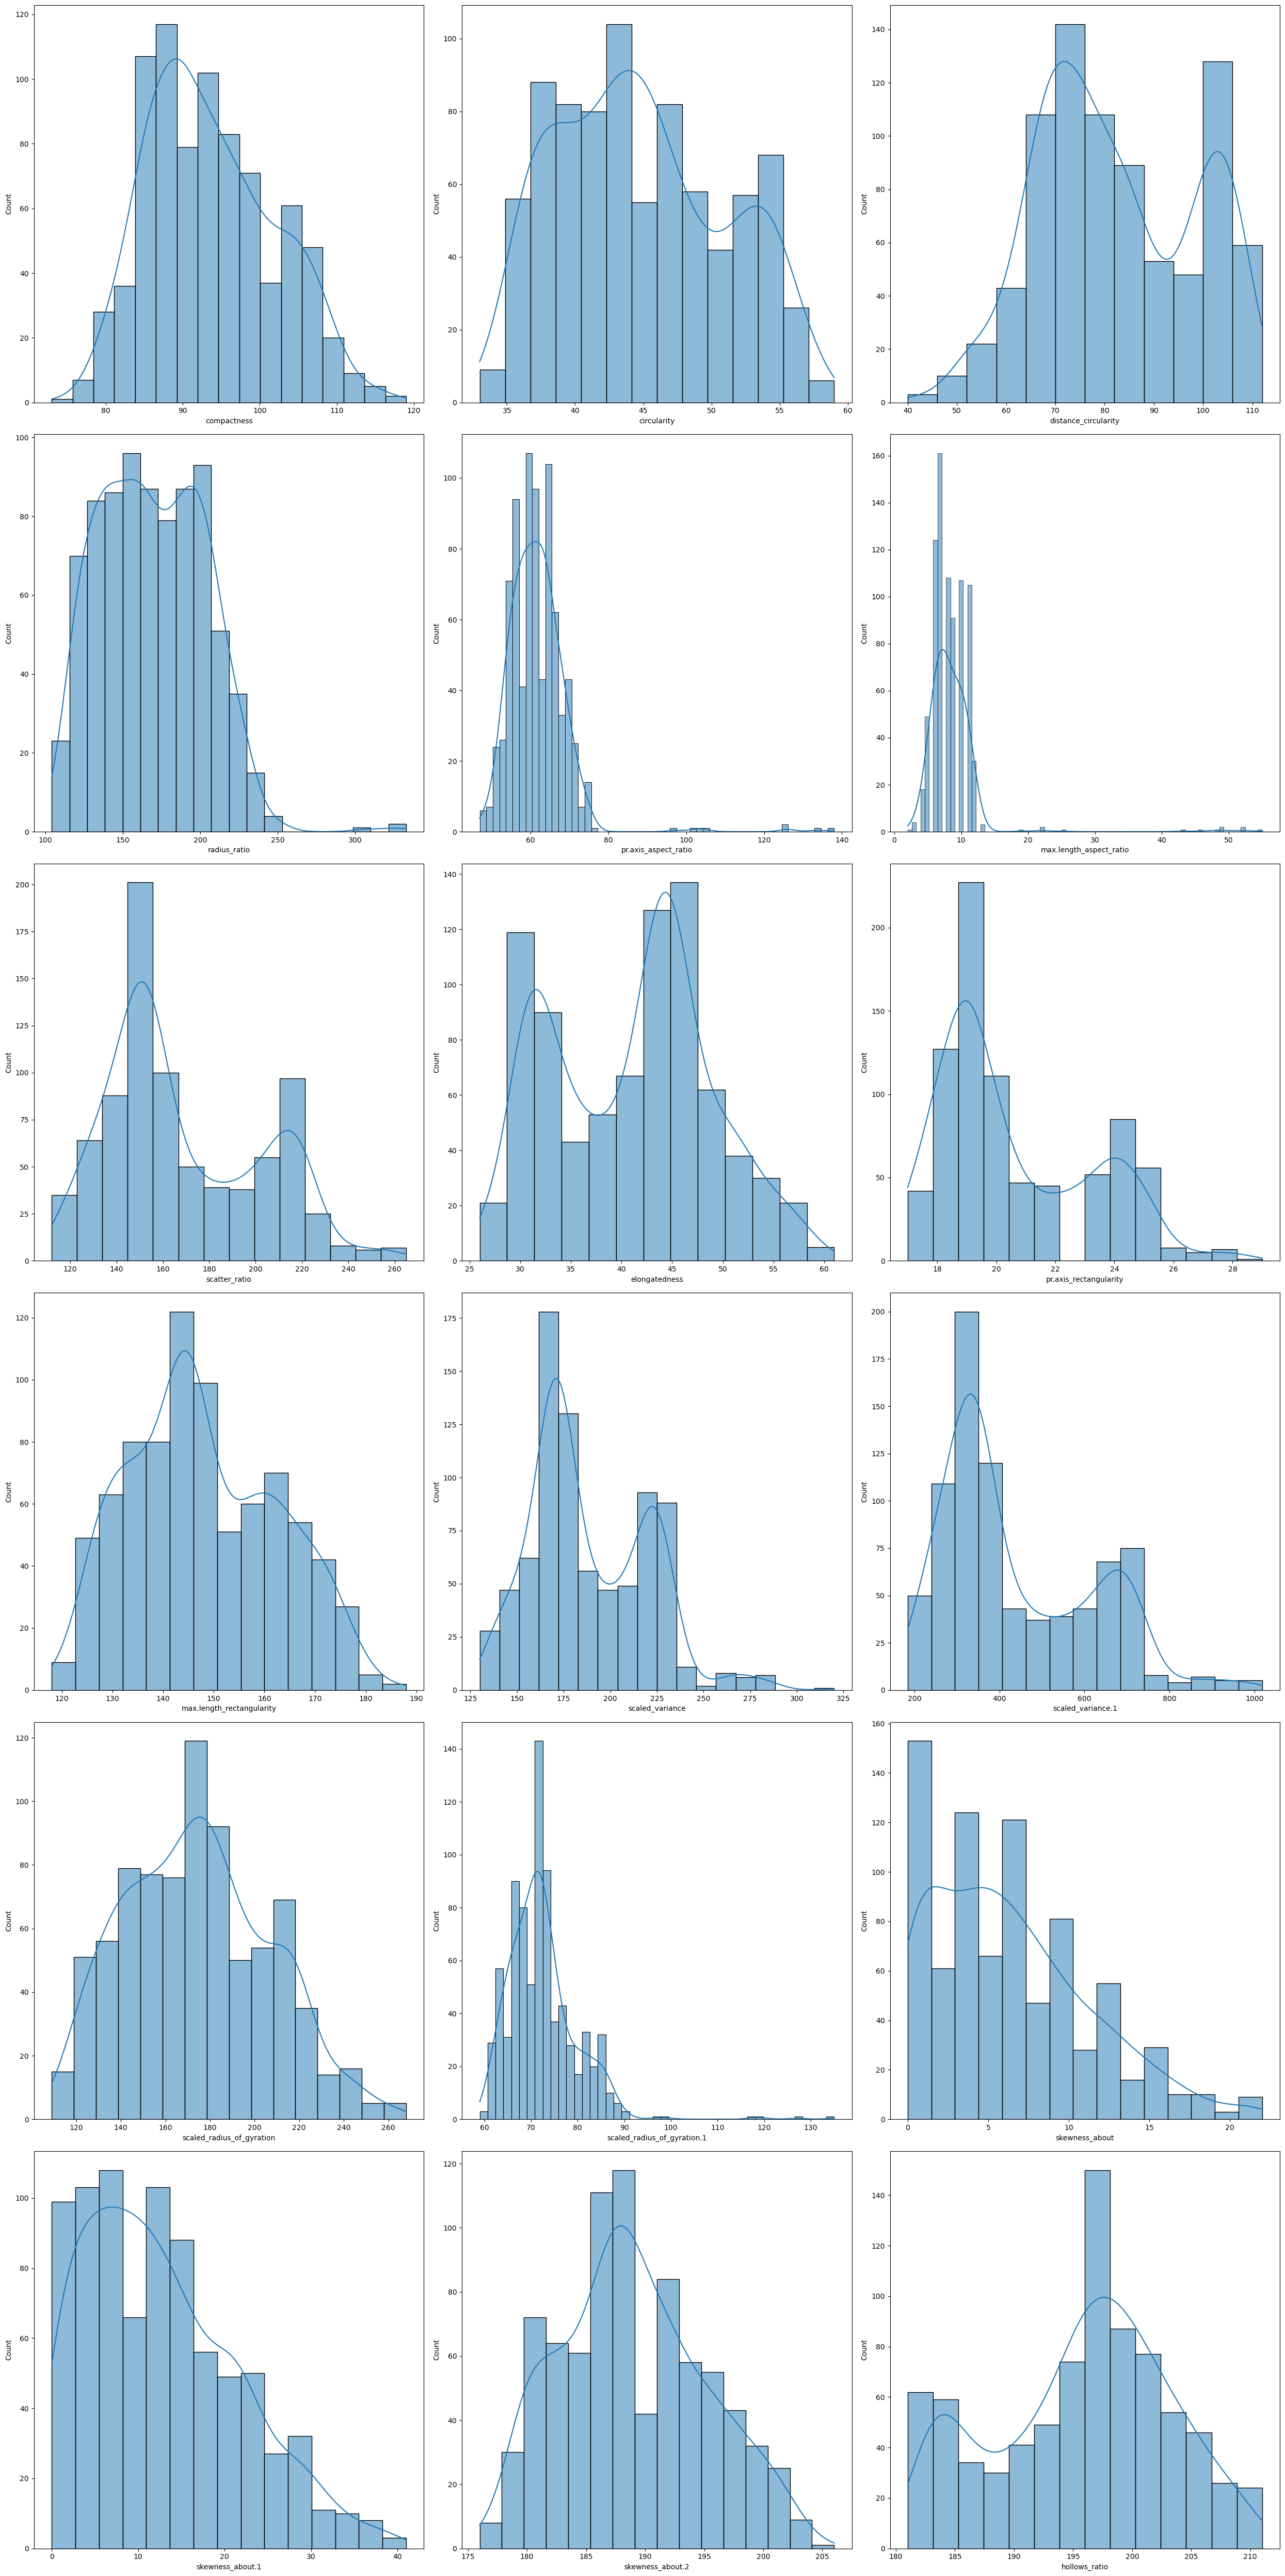

In [80]:
fig, ax= plt.subplots(6,3, figsize=(25,50))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_veh[i], ax=subplot,kde=True)
    

plt.tight_layout()
plt.show()

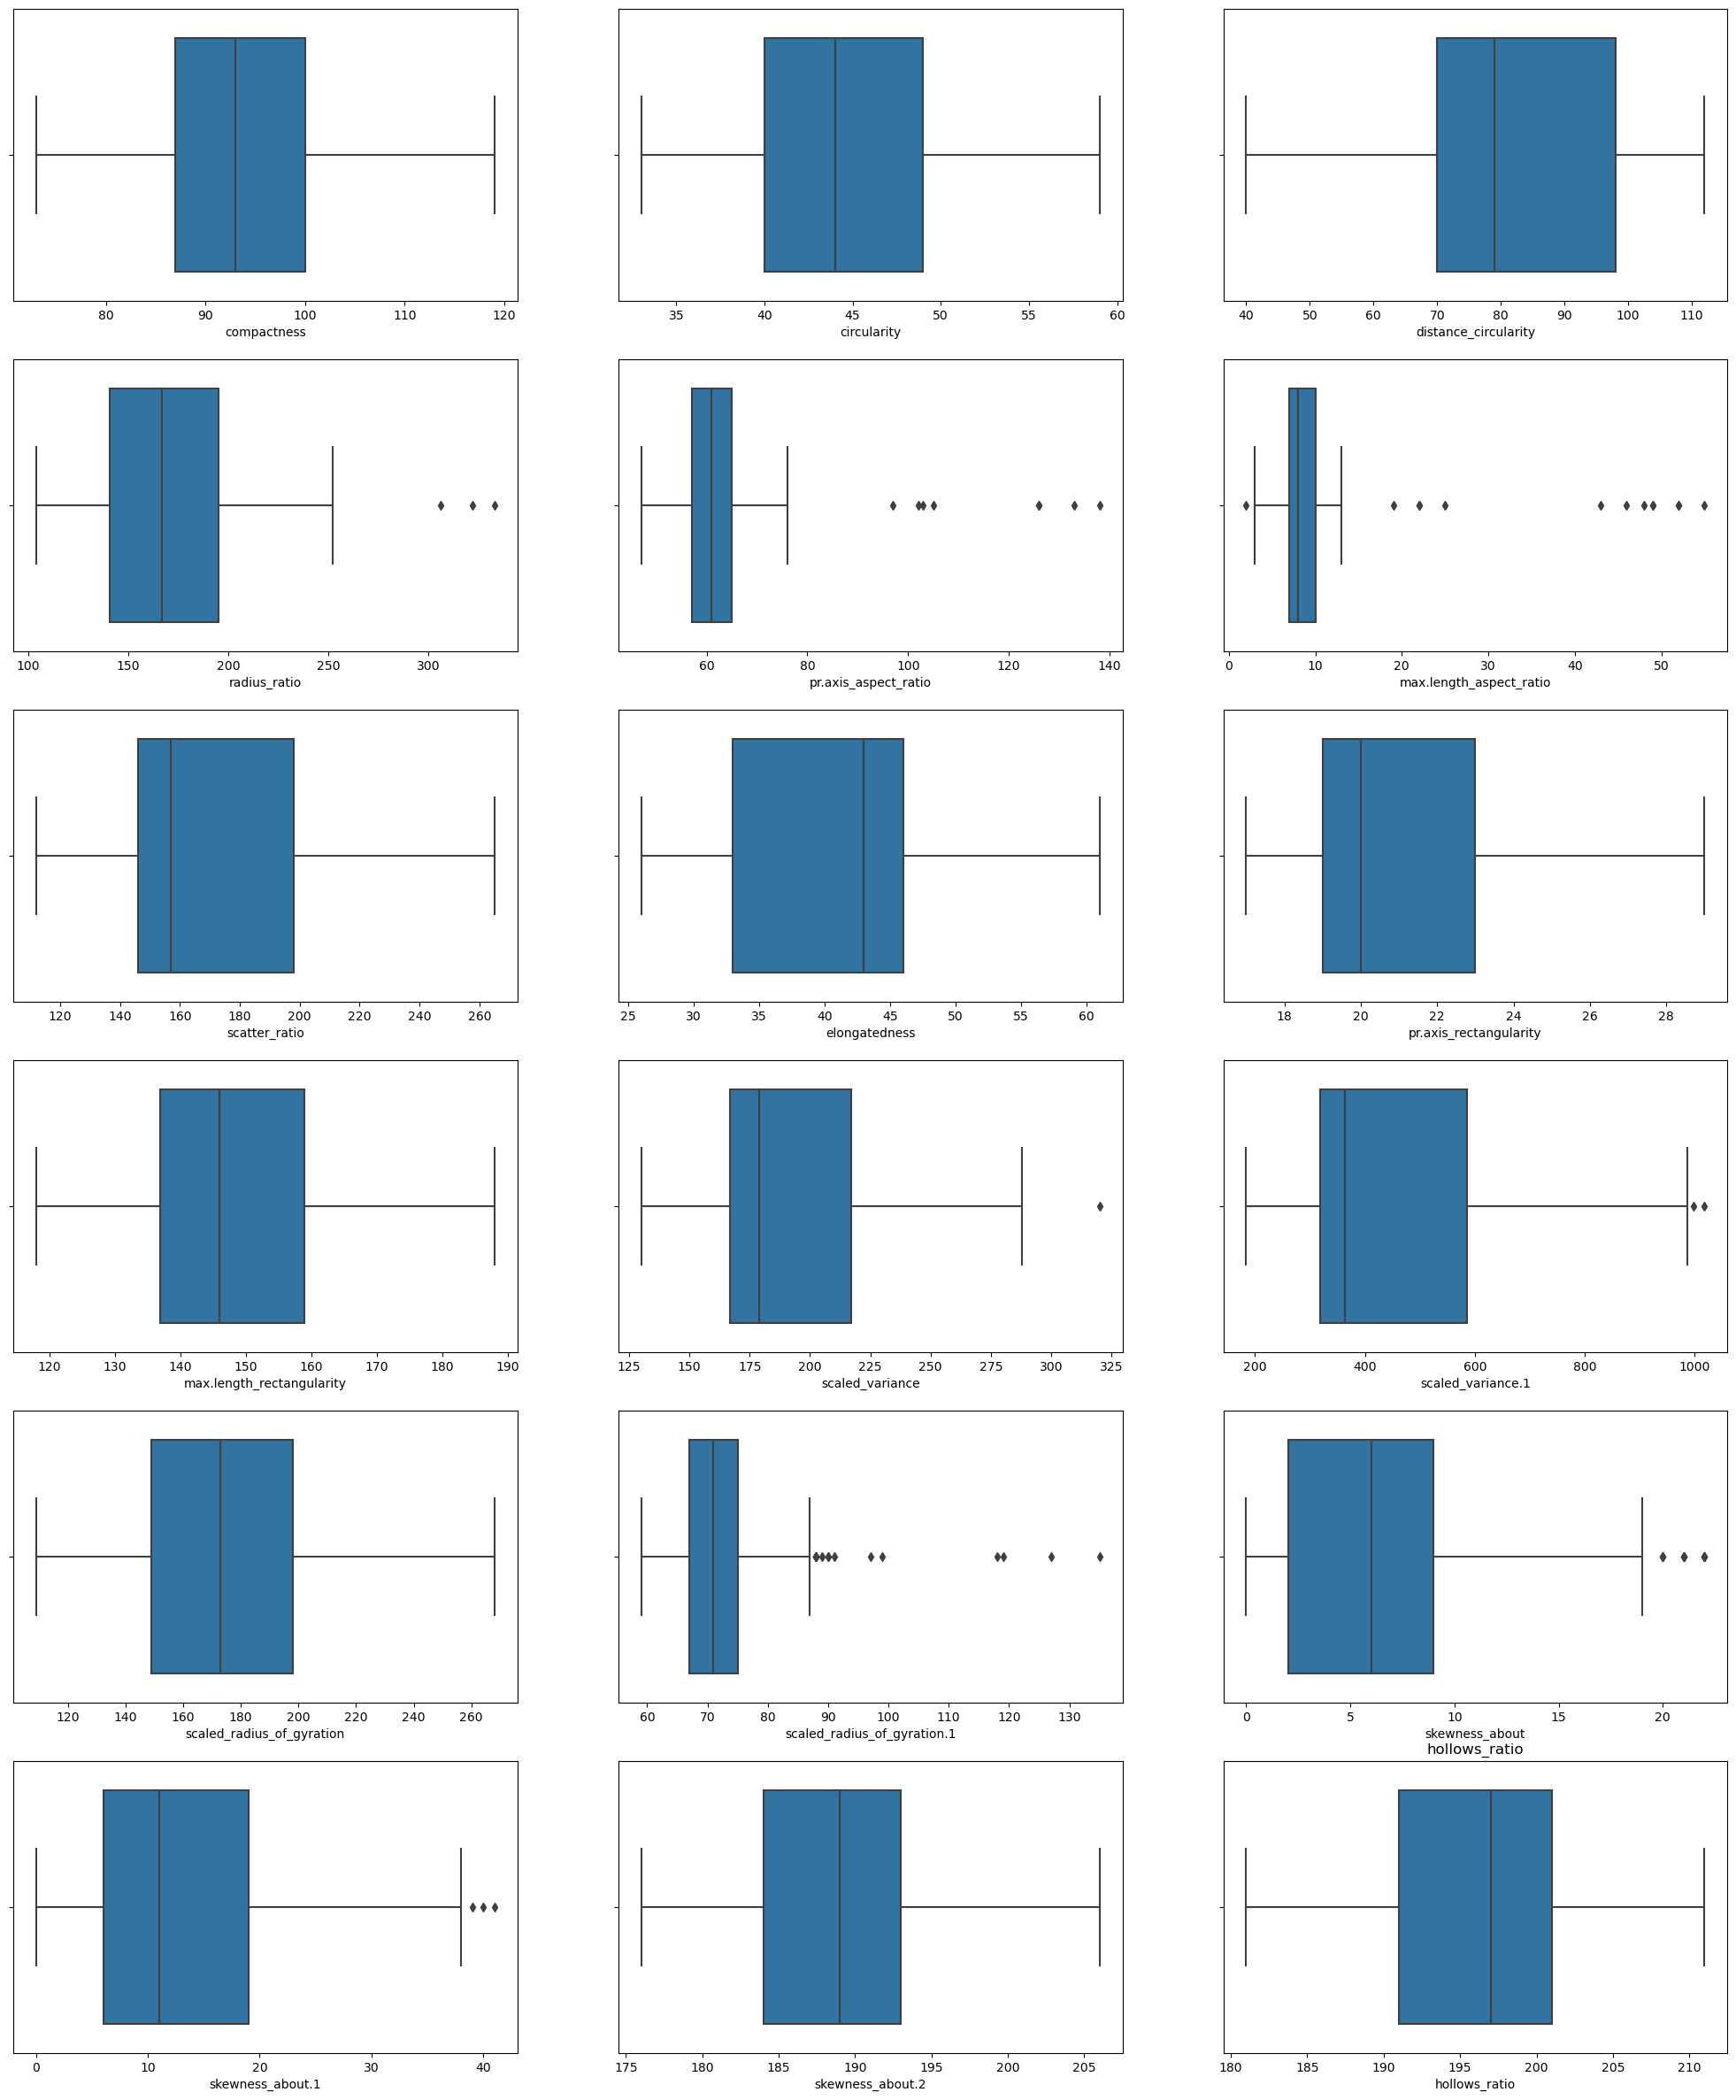

In [81]:
fig, ax= plt.subplots(6,3, figsize=(25,30))

for i, subplot in zip(cols, ax.flatten()):
  
    sns.boxplot(df_veh[i], ax=subplot)
    plt.title(i)

<Figure size 640x480 with 0 Axes>

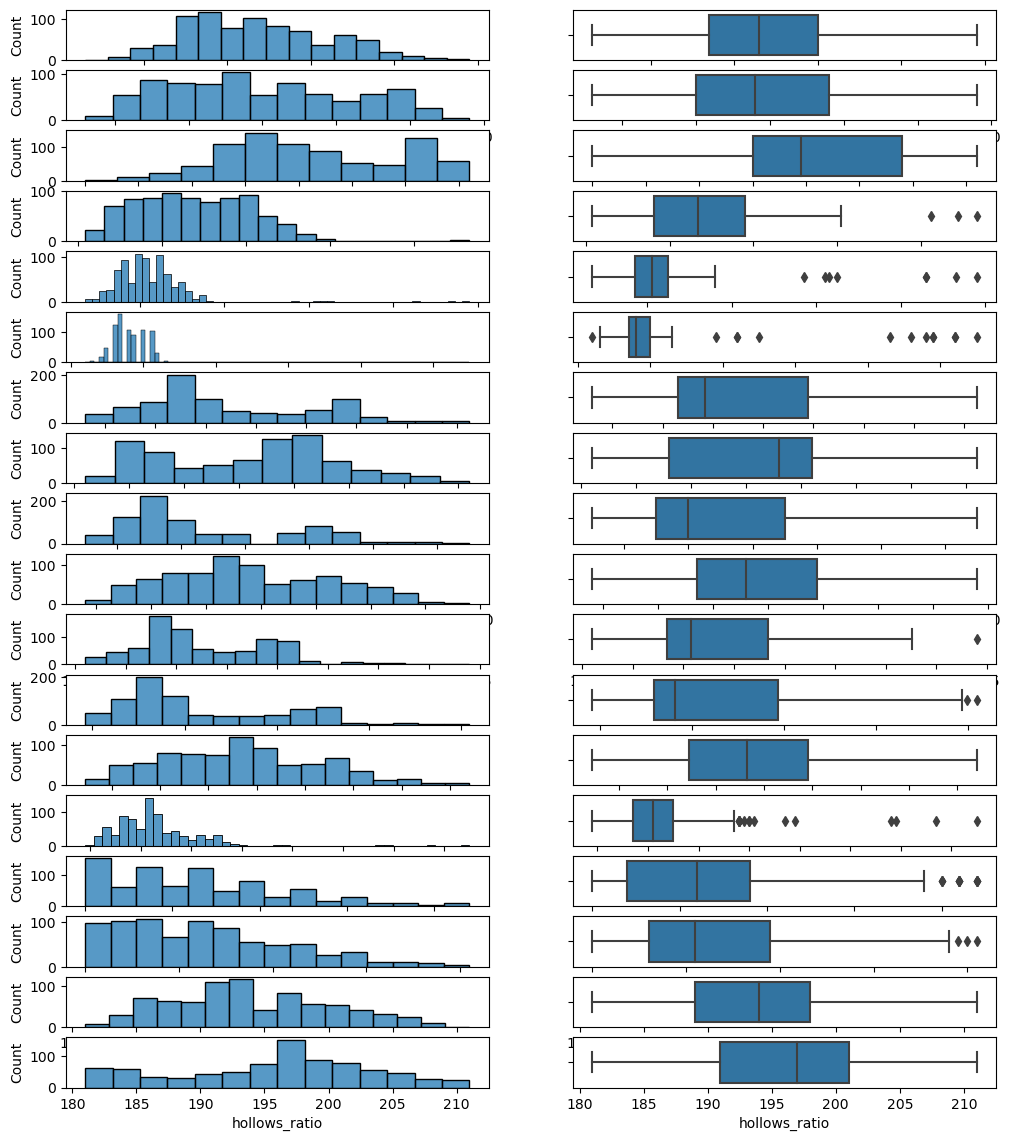

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [82]:
fig, axes = plt.subplots(nrows=18,ncols=2)
fig.set_size_inches(12, 14)

for i in range(0,18):
    plt.figure(i)
    for j in range(0,1):
        sns.histplot(cols.iloc[:,i] , ax=axes[i][j]);
        sns.boxplot(cols.iloc[:,i] , orient = "v" , ax=axes[i][j+1]);
plt.show()

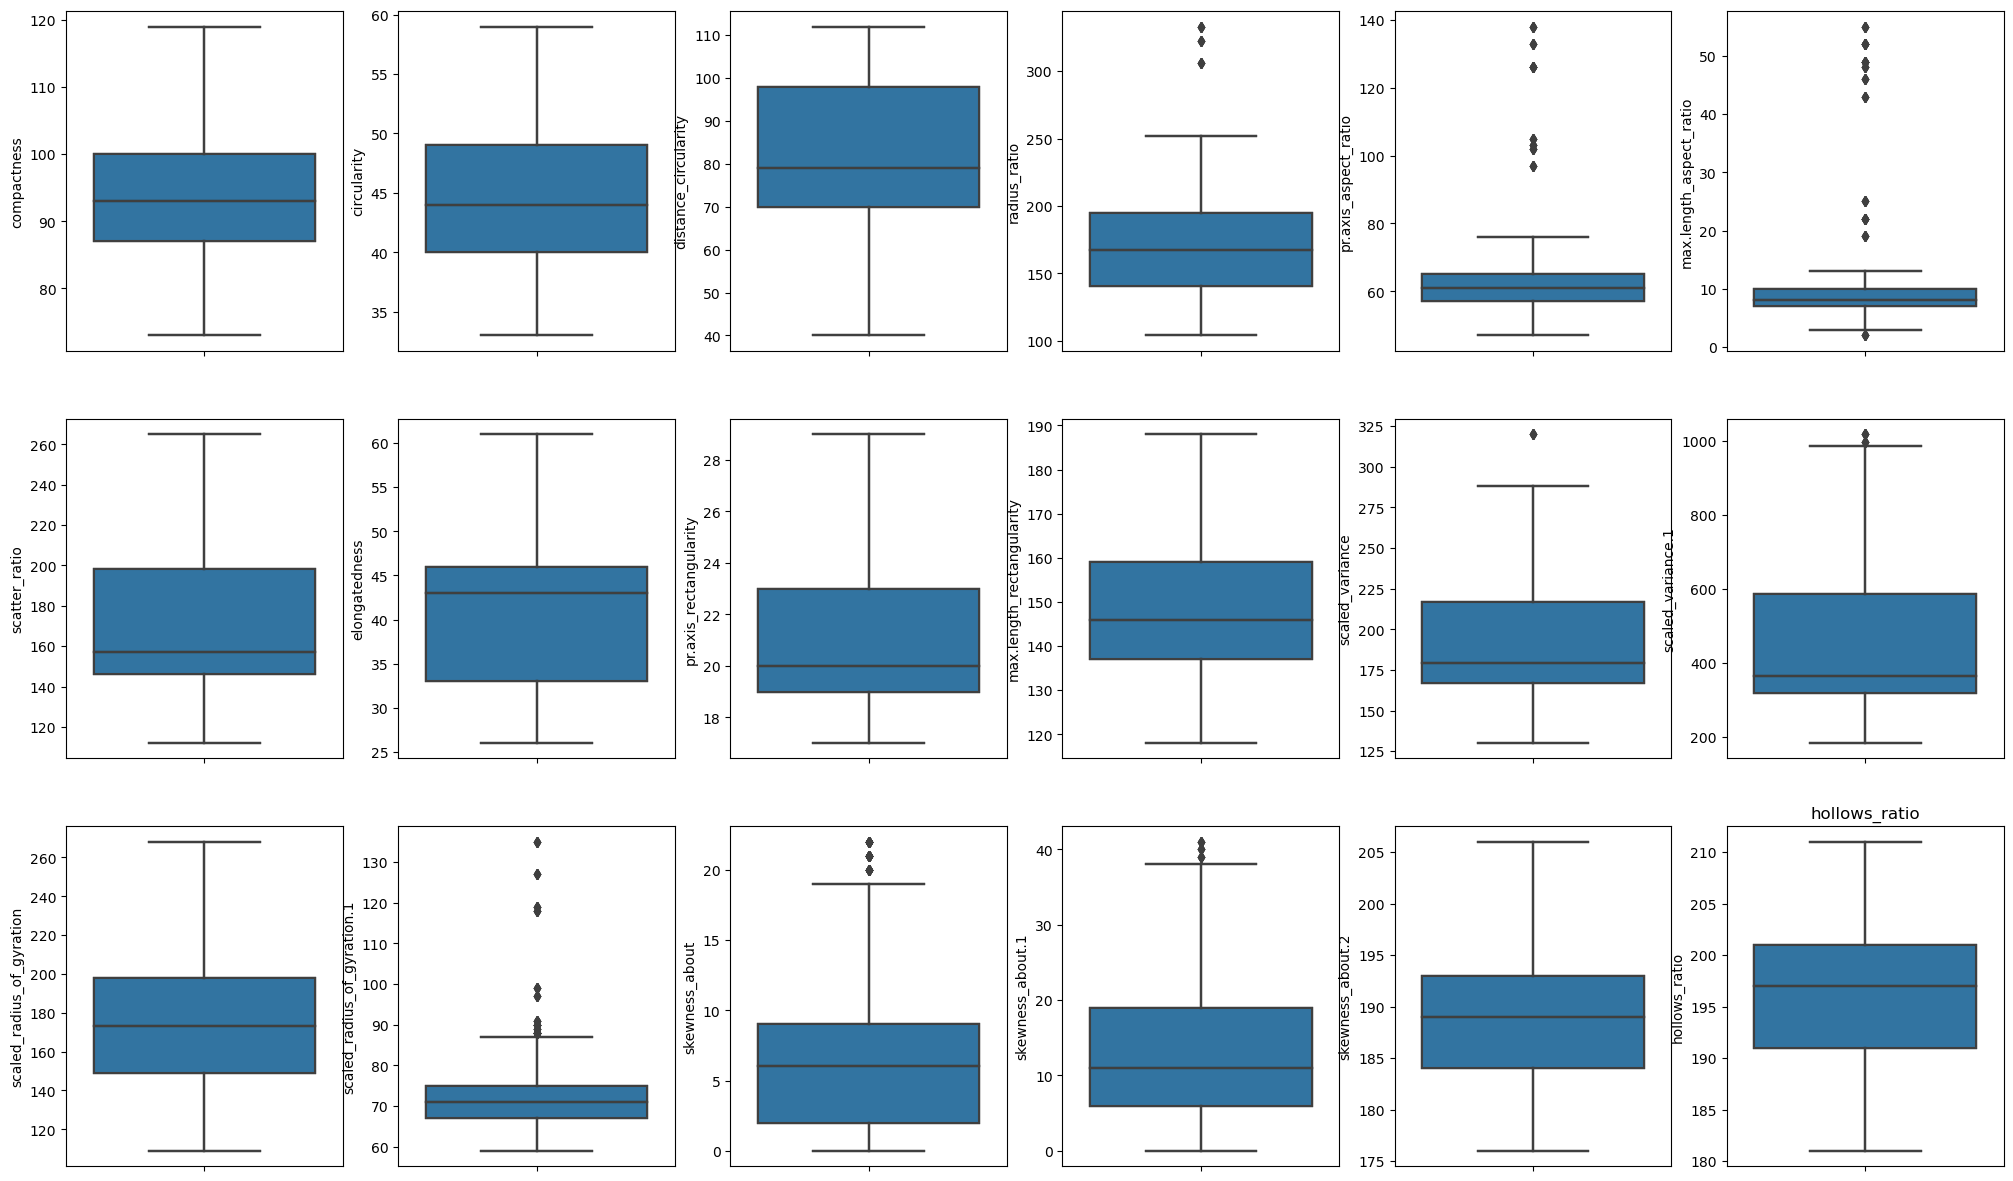

In [83]:
fig, ax= plt.subplots(3,6, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
  
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)
    sns.boxplot(y=df_veh[i], ax=subplot)
    plt.title(i)

In [84]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [85]:
for i in cols:
    ll,ul = remove_outlier(df_veh[[i]])
    df_veh[i]=np.where(df_veh[i]>ul,ul,df_veh[i])
    df_veh[i]=np.where(df_veh[i]<ll,ll,df_veh[i])
    print(i)
    print(ll,ul)

compactness
67.5 119.5
circularity
26.5 62.5
distance_circularity
28.0 140.0
radius_ratio
60.0 276.0
pr.axis_aspect_ratio
45.0 77.0
max.length_aspect_ratio
2.5 14.5
scatter_ratio
68.0 276.0
elongatedness
13.5 65.5
pr.axis_rectangularity
13.0 29.0
max.length_rectangularity
104.0 192.0
scaled_variance
92.0 292.0
scaled_variance.1
-84.0 988.0
scaled_radius_of_gyration
75.5 271.5
scaled_radius_of_gyration.1
55.0 87.0
skewness_about
-8.5 19.5
skewness_about.1
-13.5 38.5
skewness_about.2
170.5 206.5
hollows_ratio
176.0 216.0


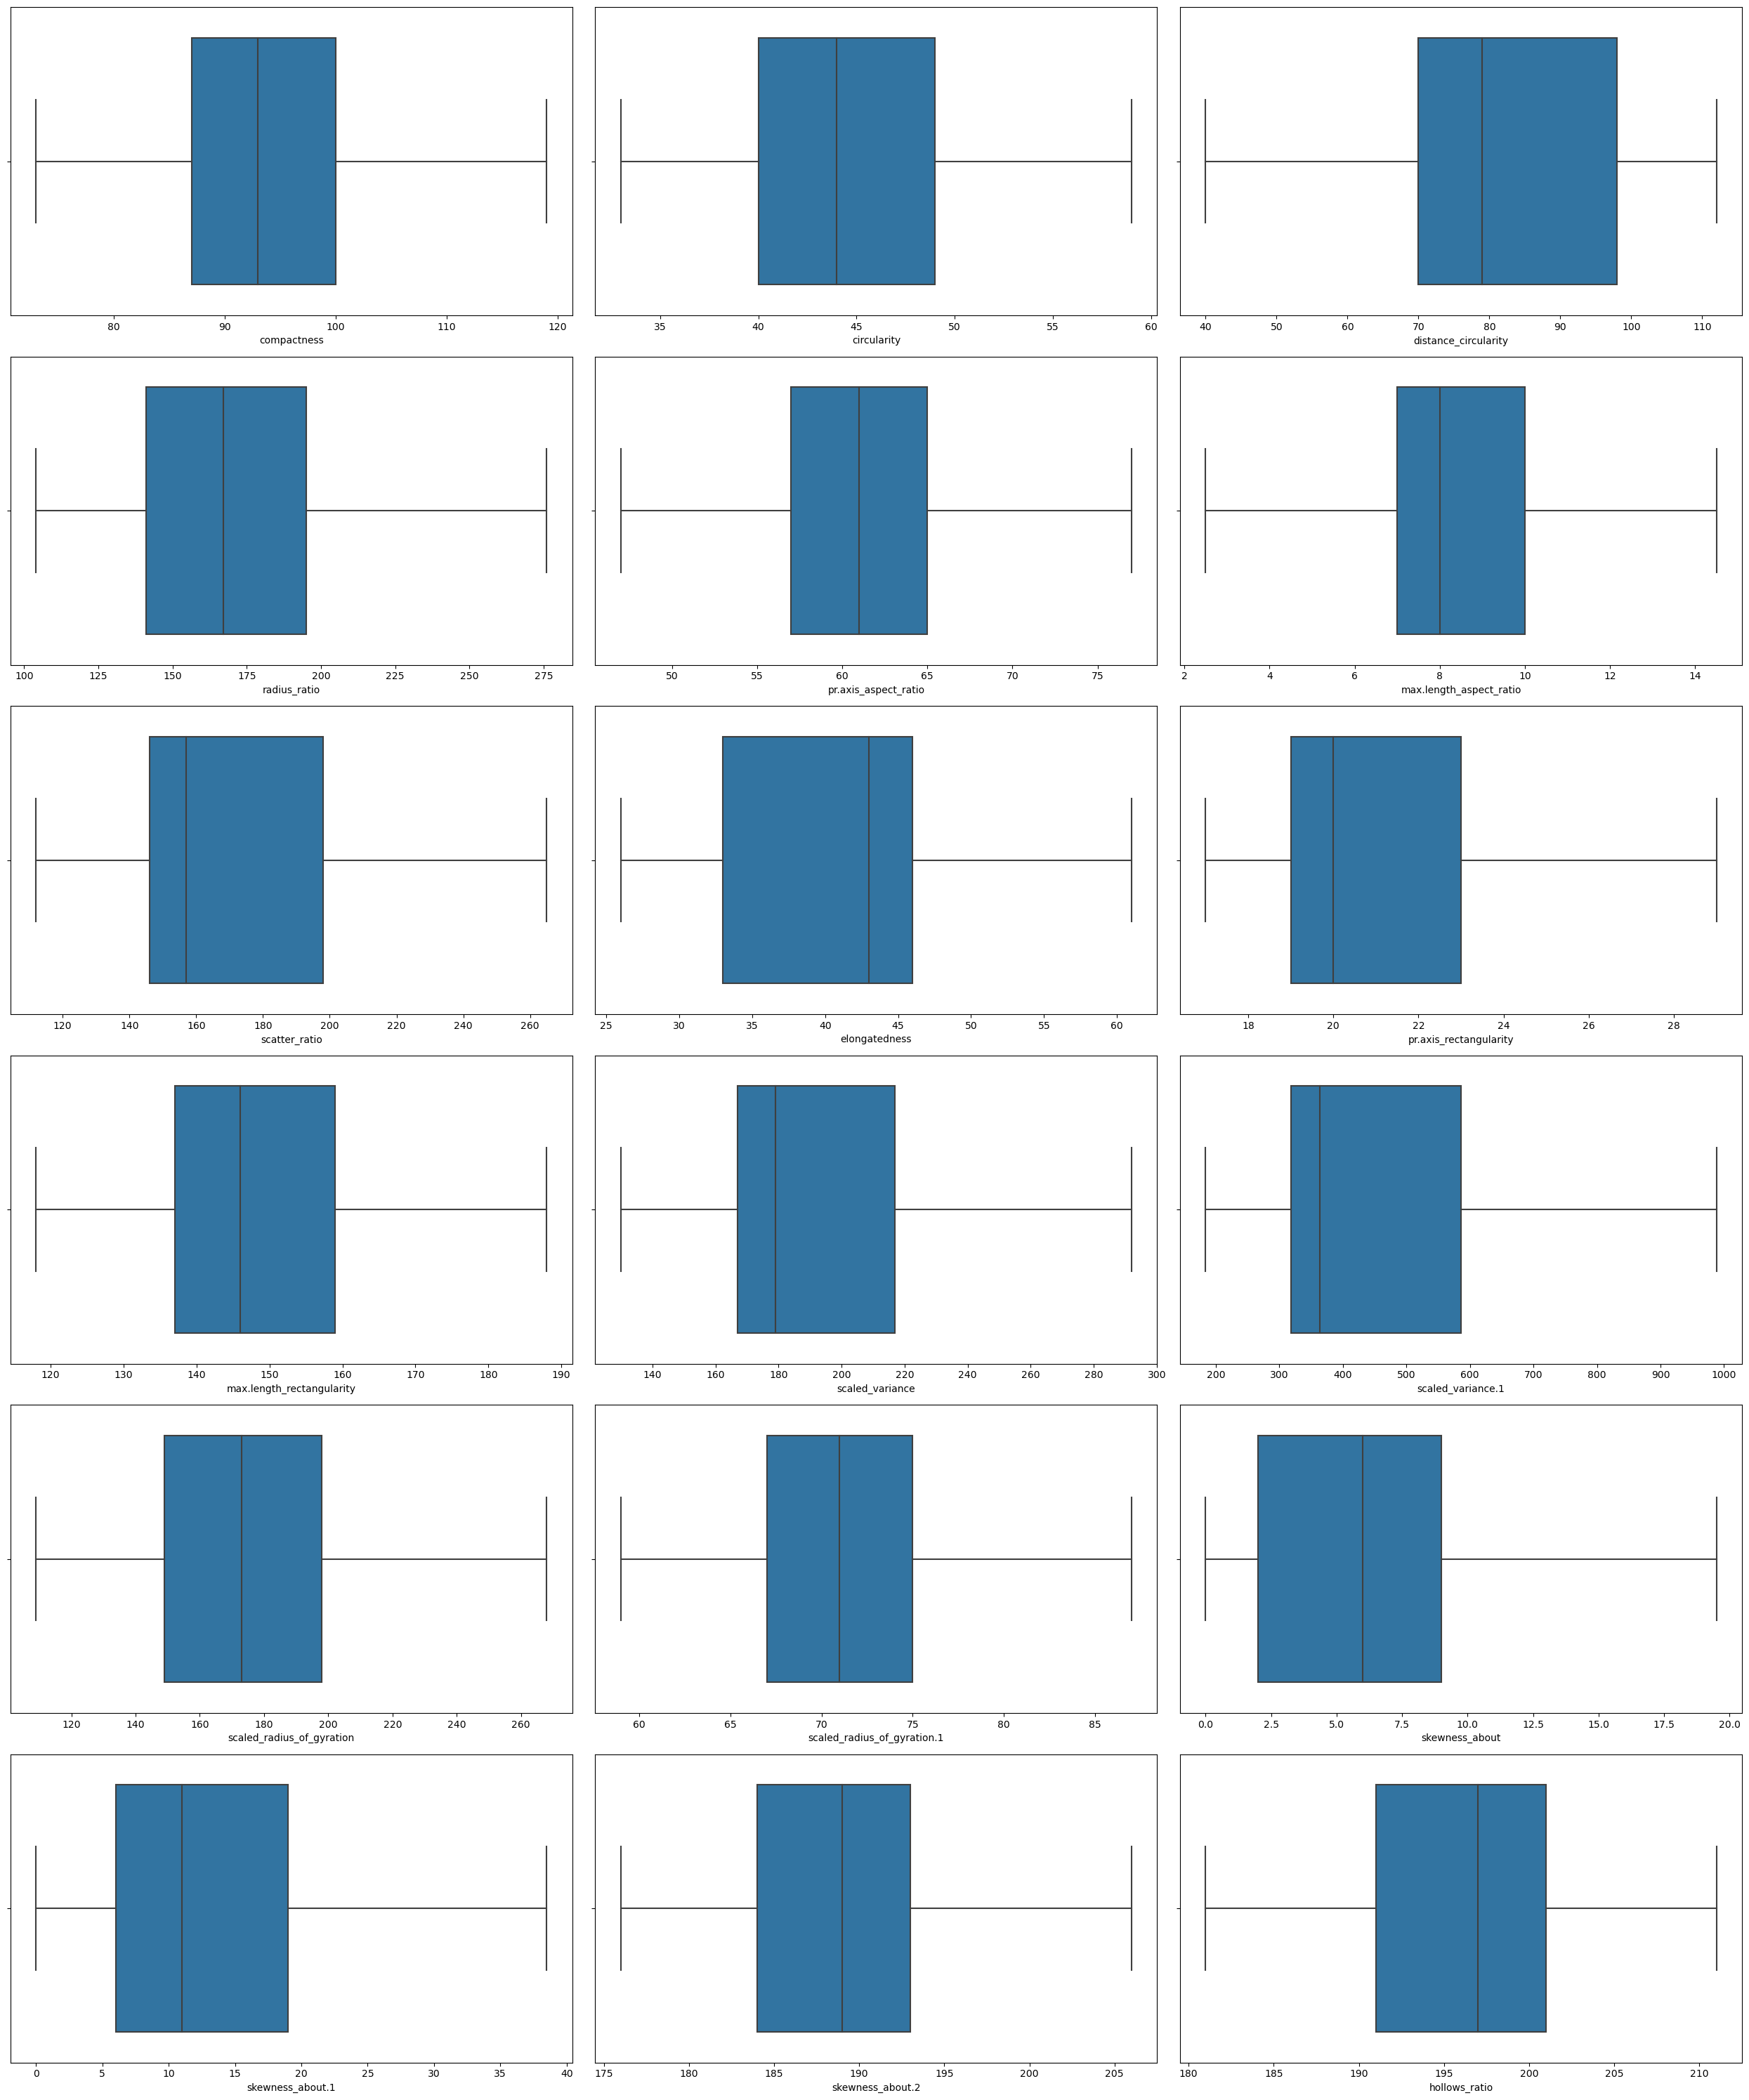

In [86]:
fig, ax= plt.subplots(6,3, figsize=(25,30))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_veh[i], ax=subplot)
   
    plt.tight_layout()
plt.show()

In [87]:
x=df_veh.drop('class',1)
y=df_veh['class']

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [92]:
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

0.901840490797546
[[72 11]
 [ 5 75]]


In [94]:
df_veh.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.702912,0.167676,0.448912,0.814026,-0.788051,0.814227,0.674902,0.767552,0.820397,0.581405,-0.274931,0.229160,0.168421,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.634144,0.200286,0.529076,0.858149,-0.825108,0.856137,0.965366,0.809099,0.851096,0.935594,0.053267,0.142041,-0.001605,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.785644,0.236747,0.619960,0.909023,-0.912713,0.897261,0.773459,0.869113,0.892180,0.705689,-0.263222,0.109620,0.277991,0.145258,0.343228
radius_ratio,0.702912,0.634144,0.785644,1.000000,0.686134,0.501396,0.759899,-0.812683,0.732499,0.578129,0.808053,0.748931,0.553418,-0.328101,0.045079,0.181979,0.385359,0.480652
pr.axis_aspect_ratio,0.167676,0.200286,0.236747,0.686134,1.000000,0.227529,0.188267,-0.288500,0.154253,0.158370,0.259671,0.174951,0.166516,-0.231624,-0.058149,-0.038356,0.358833,0.379987
max.length_aspect_ratio,0.448912,0.529076,0.619960,0.501396,0.227529,1.000000,0.456077,-0.468937,0.453606,0.619712,0.436693,0.419539,0.390697,-0.253962,0.088058,0.128494,0.050907,0.370434
scatter_ratio,0.814026,0.858149,0.909023,0.759899,0.188267,0.456077,1.000000,-0.973413,0.991992,0.808154,0.954516,0.996483,0.795748,-0.033193,0.069513,0.227595,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.812683,-0.288500,-0.468937,-0.973413,1.000000,-0.950345,-0.771099,-0.942073,-0.957181,-0.761563,0.121895,-0.046400,-0.201445,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.732499,0.154253,0.453606,0.991992,-0.950345,1.000000,0.811979,0.940258,0.992119,0.792895,-0.016989,0.077985,0.231361,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.578129,0.158370,0.619712,0.808154,-0.771099,0.811979,1.000000,0.747346,0.796457,0.865240,0.031877,0.130685,0.013441,-0.108019,0.086792


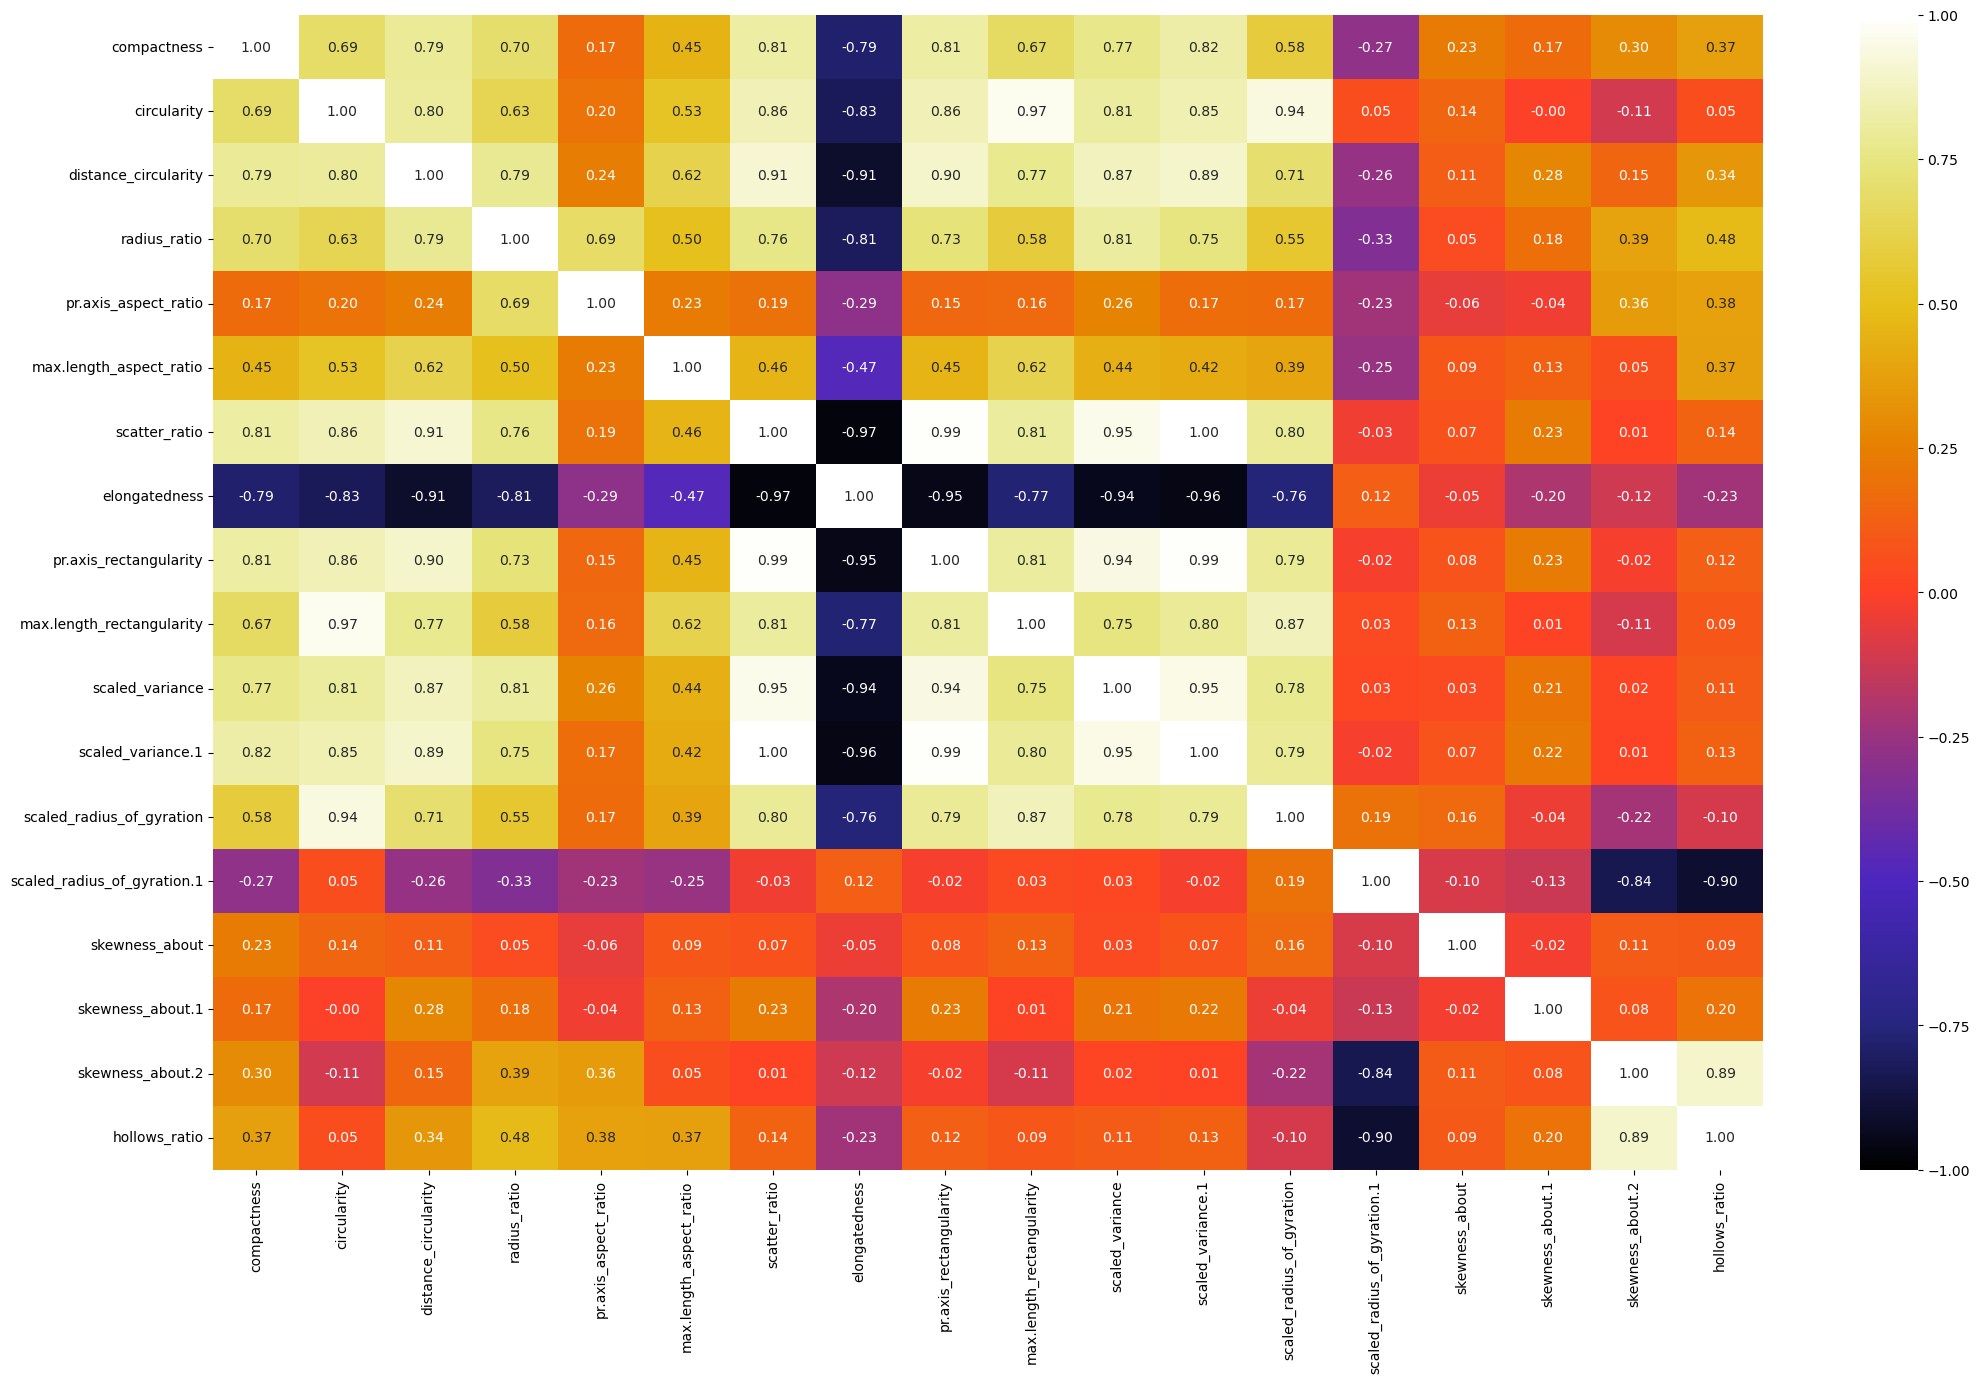

In [100]:
plt.subplots(figsize=(25,15))
sns.heatmap(df_veh.corr(), annot=True,fmt='.2f',cmap='CMRmap',vmin=-1,vmax=1)
plt.show()

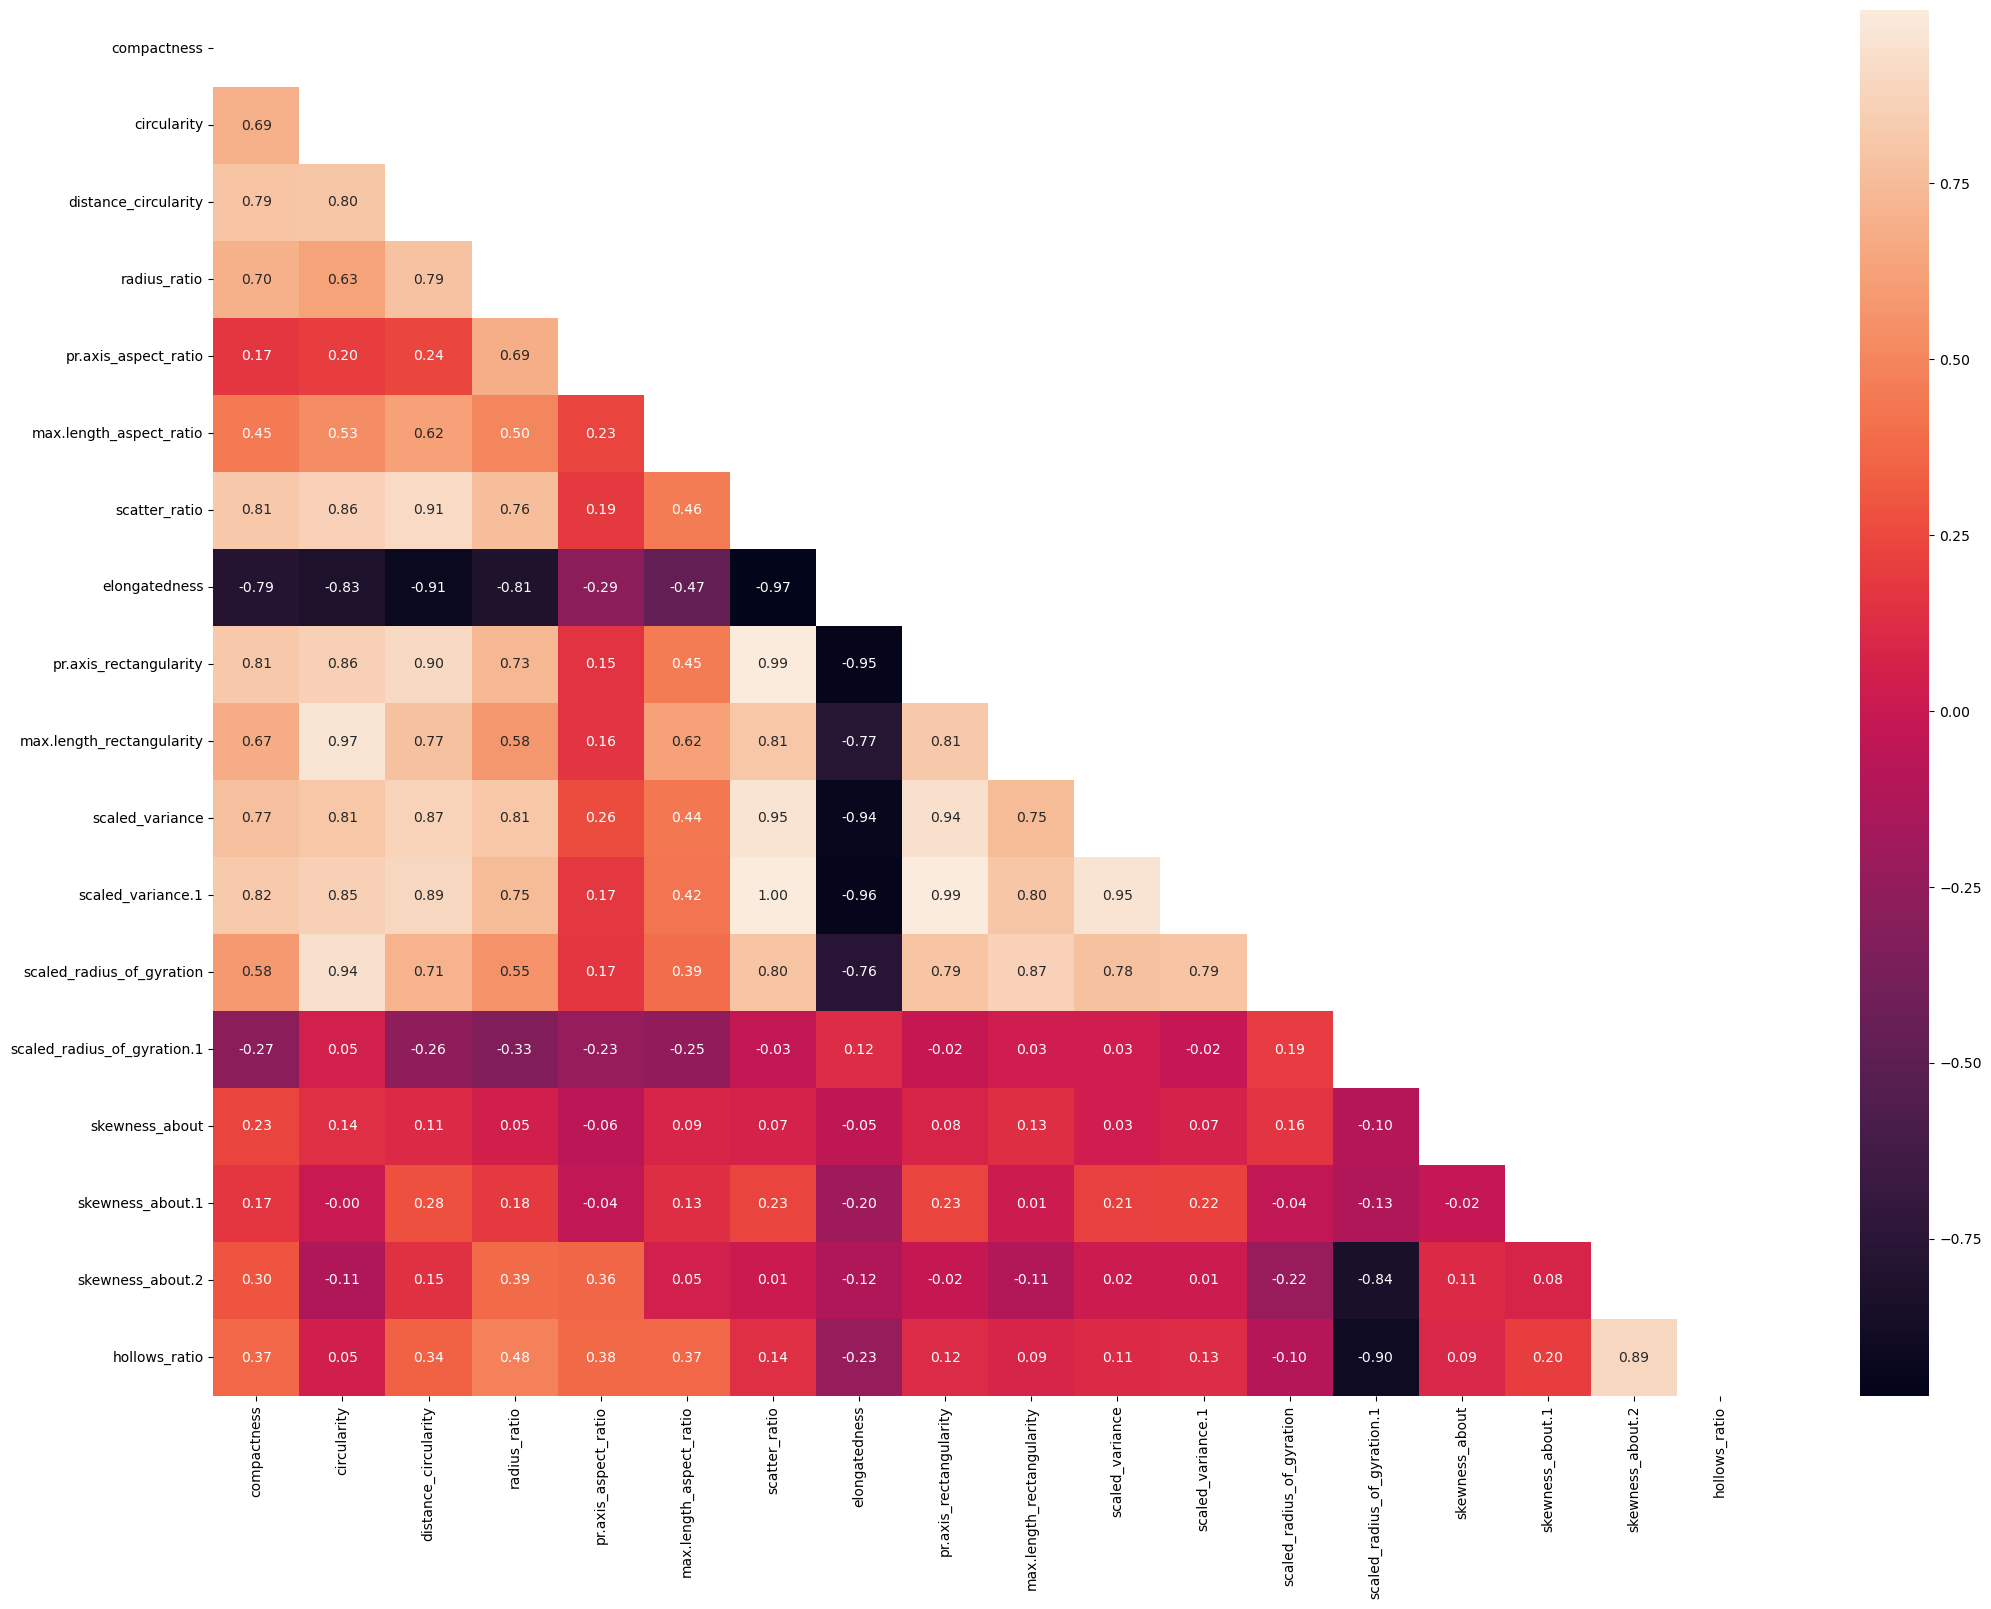

In [97]:
mask = np.triu(np.ones_like(df_veh.corr(), dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 18))
sns.heatmap(df_veh.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

x_sc=pd.DataFrame(x_sc,columns=x.columns)
x_sc.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.275095,1.814935,0.801865,-0.198517,0.129648,-0.217151,0.766312,-0.397957,-0.339039,0.301676,-0.336861,-0.067703,0.372602,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.847718,-0.750630,0.351180,-0.591720,0.514333,-0.606014,-0.337462,-0.591403,-0.619031,-0.502972,-0.025824,0.550749,0.148005,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.215831,0.788709,0.801865,1.162569,-1.152637,0.949438,0.697326,1.117373,1.123780,1.415804,0.129694,1.581501,-0.413488,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.301485,0.275596,0.351180,-0.742952,0.642562,-0.606014,-0.337462,-0.913814,-0.739028,-1.462359,-1.425488,-0.067703,-0.301190,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.094445,2.670123,2.829947,-0.591720,0.514333,-0.606014,-0.268476,1.697712,-0.647602,0.425468,2.306950,0.550749,-0.188891,-1.460039,-1.721531


In [104]:
from sklearn.decomposition import PCA

In [106]:
veh_pca=PCA()
df_veh_pca=veh_pca.fit_transform(x_sc) 
df_veh_pca=pd.DataFrame(df_veh_pca)
df_veh_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141,1.175281,-0.604407,-0.554142,-0.783111,-0.132147,0.012721,-0.092135,0.224153,0.035172,0.201335,0.020590,-0.034134,0.047753
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831,0.113167,0.183133,0.156906,0.150539,0.037967,-0.362703,-0.429105,-0.170902,-0.013235,0.098359,0.044965,0.027196,-0.023479
2,3.884148,0.268596,0.712210,0.978031,0.602153,0.876249,0.608117,0.329122,-0.214921,0.412475,-0.145956,-0.364940,-0.052122,0.027895,-0.050540,0.095465,0.166959,0.015004
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691,-0.552422,0.144005,-0.155548,-0.042445,-0.489198,-0.409128,-0.064832,-0.064927,0.221135,-0.032533,-0.109106,-0.113052,-0.000596
4,0.053880,1.854078,2.549616,-1.273745,-1.495840,3.593726,1.682425,-0.079624,1.308133,0.807869,0.325874,0.471145,0.456218,0.542395,0.701259,-0.264972,-0.161192,0.027127


In [108]:
veh_pca.explained_variance_   # eigen values getting 

array([9.75592419e+00, 3.26593719e+00, 1.20041435e+00, 1.17739558e+00,
       8.54137636e-01, 7.49103421e-01, 3.46961731e-01, 2.22403000e-01,
       1.32208401e-01, 9.75160321e-02, 6.02445504e-02, 5.48653930e-02,
       3.99381171e-02, 2.67746874e-02, 1.87215832e-02, 1.29036168e-02,
       6.35471760e-03, 3.63296016e-04])

In [110]:
eig_val=veh_pca.explained_variance_ratio_.round(2)*100
eig_val

array([54., 18.,  7.,  7.,  5.,  4.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [112]:
cumvar=np.cumsum(veh_pca.explained_variance_ratio_)
cumvar

array([0.54132913, 0.72254691, 0.78915456, 0.85448497, 0.9018787 ,
       0.94344437, 0.96269631, 0.97503683, 0.98237271, 0.9877836 ,
       0.99112641, 0.99417073, 0.99638679, 0.99787244, 0.99891125,
       0.99962724, 0.99997984, 1.        ])

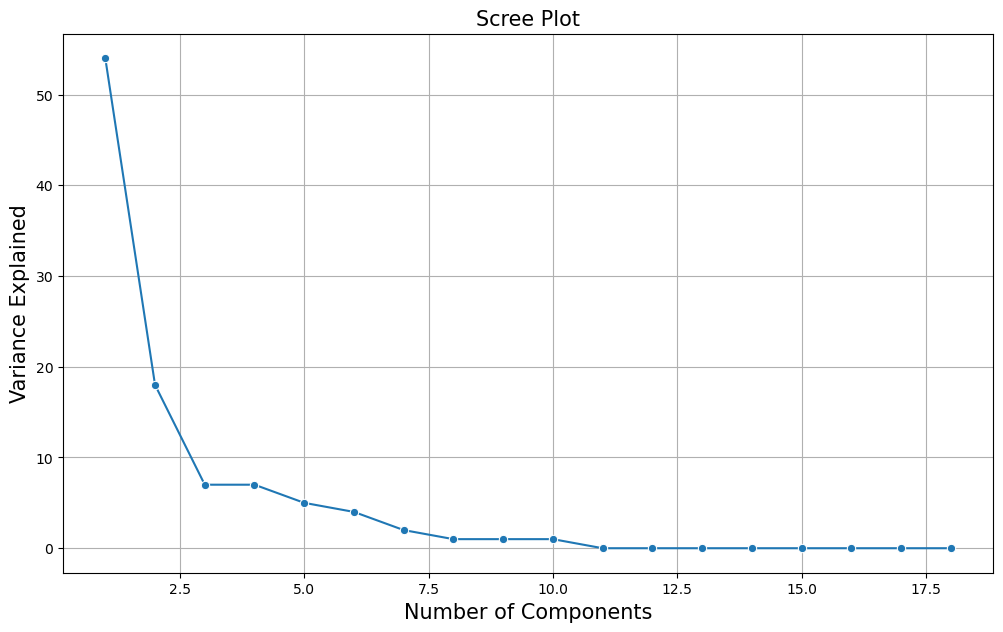

In [113]:
plt.figure(figsize=(12,7))
sns.lineplot(y=eig_val,x=range(1,len(eig_val)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

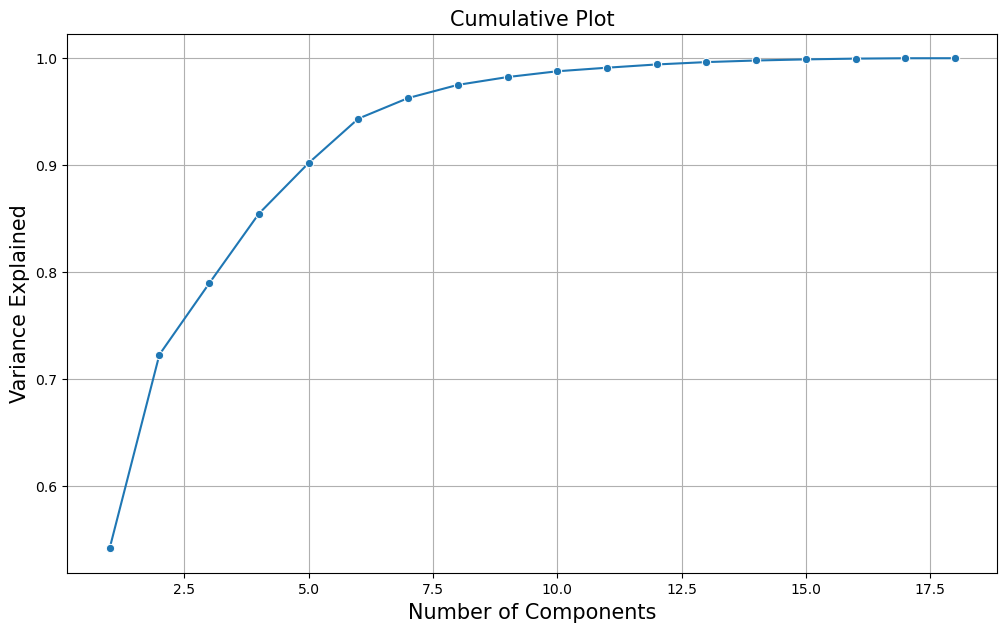

In [115]:
# just visualisation of cumilative distribution
plt.figure(figsize=(12,7))
sns.lineplot(y=cumvar,x=range(1,len(cumvar)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Cumulative Plot',fontsize=15)
plt.grid()
plt.show()

In [142]:
my_pca=PCA(n_components=5)
pca_n=my_pca.fit_transform(x_sc)
pca_n

array([[ 0.55690765, -0.54251542,  1.12911537, -0.40344906, -0.96314136],
       [-1.51767247, -0.37416824, -0.58222088,  0.92966019, -0.64183141],
       [ 3.88414779,  0.26859609,  0.71220995,  0.97803132,  0.60215272],
       ...,
       [ 5.06749158, -0.05384067,  1.23052759, -0.43621867, -0.84678231],
       [-3.28174242, -1.06945722, -1.56353951, -1.16324244, -0.54293317],
       [-4.93480055,  0.39720101, -1.1666015 , -0.67250224, -0.10335546]])

In [118]:
pca_n.shape

(813, 5)

In [119]:
X_train,X_test,y_train,y_test=train_test_split(pca_n,y,test_size=0.2,random_state=100)

In [120]:
dt=DecisionTreeClassifier(random_state=100)  
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

0.8466257668711656
[[68 14]
 [11 70]]


In [124]:
# onlu for increase accuracy but not usefull technique
# dont run this cell only for checking if component increase then accuracy score is increase or not 




# my_pca=PCA(n_components=10)
# pca_n=my_pca.fit_transform(x_sc)
# pca_n
# X_train,X_test,y_train,y_test=train_test_split(pca_n,y,test_size=0.2,random_state=100)

In [125]:
# dt=DecisionTreeClassifier(random_state=100)  
# dt.fit(X_train,y_train)
# y_pred_dt=dt.predict(X_test)
# print(accuracy_score(y_test,y_pred_dt))
# print(confusion_matrix(y_test,y_pred_dt))

0.8773006134969326
[[69 13]
 [ 7 74]]


In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [130]:
lda=LDA()
lda_data=lda.fit_transform(x_sc,y)


In [126]:
lda.explained_variance_ratio_   # eigen value

array([1.])

In [127]:
X_train,X_test,y_train,y_test=train_test_split(lda_data,y,test_size=0.2,random_state=100)

In [128]:
dt=DecisionTreeClassifier(random_state=100)  
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))

0.901840490797546
[[70 12]
 [ 4 77]]


In [137]:
# increase bcz it is not played with independent variable 

In [138]:
lda_data=lda.fit_transform(X_train,y_train)
y_predict_lda=lda.predict(X_test)
print(accuracy_score(y_test,y_predict_lda))
print(confusion_matrix(y_test,y_predict_lda))

0.9693251533742331
[[78  4]
 [ 1 80]]


# CLUSTERING

In [144]:
# go and choose n_components=5
df_pcax=pd.DataFrame(pca_n)

In [145]:
df_pcax.head()

,0,1,2,3,4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [146]:
# pca with 5 component
err=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(df_pcax)
    err.append(km.inertia_)

In [147]:
err

[13198.092859923652,
 7048.627119875315,
 5301.082450217313,
 4675.187990466592,
 4157.164417840551,
 3704.8835525504214,
 3443.8592210666343,
 3215.64679645615,
 3033.6235937378306,
 2870.338243025546,
 2691.567497410401,
 2557.258450366786,
 2436.367391128388,
 2332.8007987265305,
 2243.4820865178144,
 2189.5831738495963,
 2086.4307852458055,
 2008.4079399165907,
 1998.0964039257735]

<AxesSubplot:>

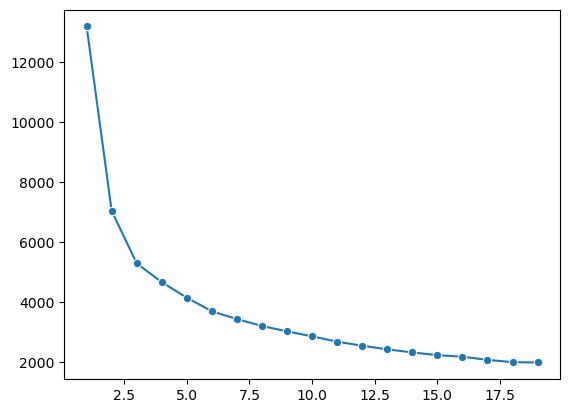

In [150]:
sns.lineplot(x=range(1,20),y=err,marker='o')

In [155]:
from sklearn.metrics import silhouette_score

In [160]:
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit(df_pcax)
    print('Silhouette for i' , i,'cluster is ',silhouette_score(df_pcax,km.labels_))

Silhouette for i 2 cluster is  0.4125234337058168
Silhouette for i 3 cluster is  0.3288334400510399
Silhouette for i 4 cluster is  0.27838713900016854
Silhouette for i 5 cluster is  0.24766662401321704
Silhouette for i 6 cluster is  0.2713312013454204
Silhouette for i 7 cluster is  0.26335056638226984
Silhouette for i 8 cluster is  0.23085655139008956
Silhouette for i 9 cluster is  0.23366349727644467
Silhouette for i 10 cluster is  0.21725923282932433
Silhouette for i 11 cluster is  0.21980192083058242
Silhouette for i 12 cluster is  0.230039474457281
Silhouette for i 13 cluster is  0.23402505455423883
Silhouette for i 14 cluster is  0.23434724817187205
Silhouette for i 15 cluster is  0.22808594503432938
Silhouette for i 16 cluster is  0.22698706570196012
Silhouette for i 17 cluster is  0.2293076697693832
Silhouette for i 18 cluster is  0.22400336555418707
Silhouette for i 19 cluster is  0.23053596651994906


In [168]:
my_pca.components_

array([[ 0.27146371,  0.28873877,  0.30209003,  0.26875402,  0.09940084,
         0.18735446,  0.31059127, -0.30822674,  0.30743032,  0.27758356,
         0.30119684,  0.30768884,  0.26319643, -0.04692969,  0.03952566,
         0.06312533,  0.03673543,  0.08756744],
       [-0.09109202,  0.13976157, -0.04954063, -0.18722272, -0.23135175,
        -0.09181354,  0.07013779, -0.00798776,  0.08373525,  0.12409768,
         0.07162319,  0.07509761,  0.21124117,  0.50189383, -0.03976279,
        -0.09287341, -0.51343795, -0.51400308],
       [-0.11351879,  0.16127126, -0.11246007,  0.17510458,  0.53214408,
         0.09464219, -0.108663  ,  0.04643321, -0.12674288,  0.1423553 ,
        -0.05235788, -0.11532382,  0.1857444 ,  0.06294408,  0.00258174,
        -0.72116946,  0.01786564, -0.0213105 ],
       [ 0.16145967,  0.12437562,  0.01149969, -0.2284872 , -0.39091959,
         0.13716086, -0.05356889,  0.09567491, -0.03321075,  0.16446121,
        -0.13826734, -0.05070689,  0.11060084, -0.145

In [161]:
df_pca_loading=pd.DataFrame(my_pca.components_,columns=list(x_sc))
df_pca_loading.shape

(5, 18)

In [163]:
df_pca_loading

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.271464,0.288739,0.302090,0.268754,0.099401,0.187354,0.310591,-0.308227,0.307430,0.277584,0.301197,0.307689,0.263196,-0.046930,0.039526,0.063125,0.036735,0.087567
1,-0.091092,0.139762,-0.049541,-0.187223,-0.231352,-0.091814,0.070138,-0.007988,0.083735,0.124098,0.071623,0.075098,0.211241,0.501894,-0.039763,-0.092873,-0.513438,-0.514003
2,-0.113519,0.161271,-0.112460,0.175105,0.532144,0.094642,-0.108663,0.046433,-0.126743,0.142355,-0.052358,-0.115324,0.185744,0.062944,0.002582,-0.721169,0.017866,-0.021310
3,0.161460,0.124376,0.011500,-0.228487,-0.390920,0.137161,-0.053569,0.095675,-0.033211,0.164461,-0.138267,-0.050707,0.110601,-0.145347,0.758285,-0.237025,0.051802,0.073551
4,0.159996,-0.100215,-0.105963,0.118206,0.112277,-0.773470,0.106395,-0.111923,0.094410,-0.254059,0.147761,0.146715,0.021438,0.097817,0.308477,-0.120791,0.232167,-0.118125


In [162]:
df_pca_loading.T

,0,1,2,3,4
compactness,0.271464,-0.091092,-0.113519,0.161460,0.159996
circularity,0.288739,0.139762,0.161271,0.124376,-0.100215
distance_circularity,0.302090,-0.049541,-0.112460,0.011500,-0.105963
radius_ratio,0.268754,-0.187223,0.175105,-0.228487,0.118206
pr.axis_aspect_ratio,0.099401,-0.231352,0.532144,-0.390920,0.112277
max.length_aspect_ratio,0.187354,-0.091814,0.094642,0.137161,-0.773470
scatter_ratio,0.310591,0.070138,-0.108663,-0.053569,0.106395
elongatedness,-0.308227,-0.007988,0.046433,0.095675,-0.111923
pr.axis_rectangularity,0.307430,0.083735,-0.126743,-0.033211,0.094410
max.length_rectangularity,0.277584,0.124098,0.142355,0.164461,-0.254059


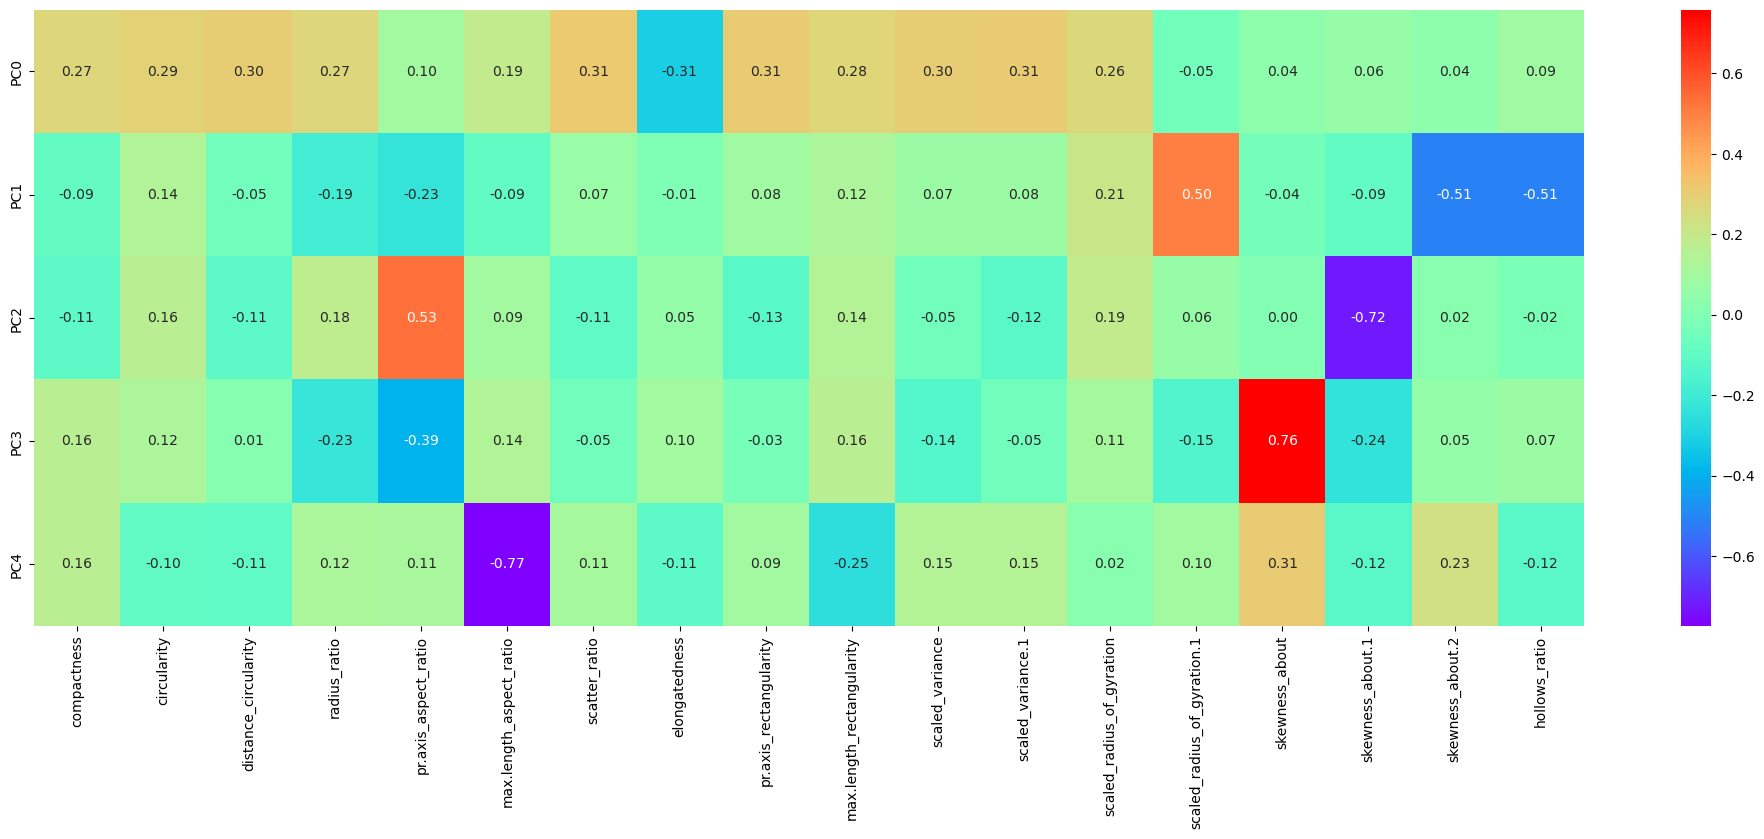

In [167]:
plt.figure(figsize=(25,8))
sns.heatmap(df_pca_loading,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4'])
plt.show()


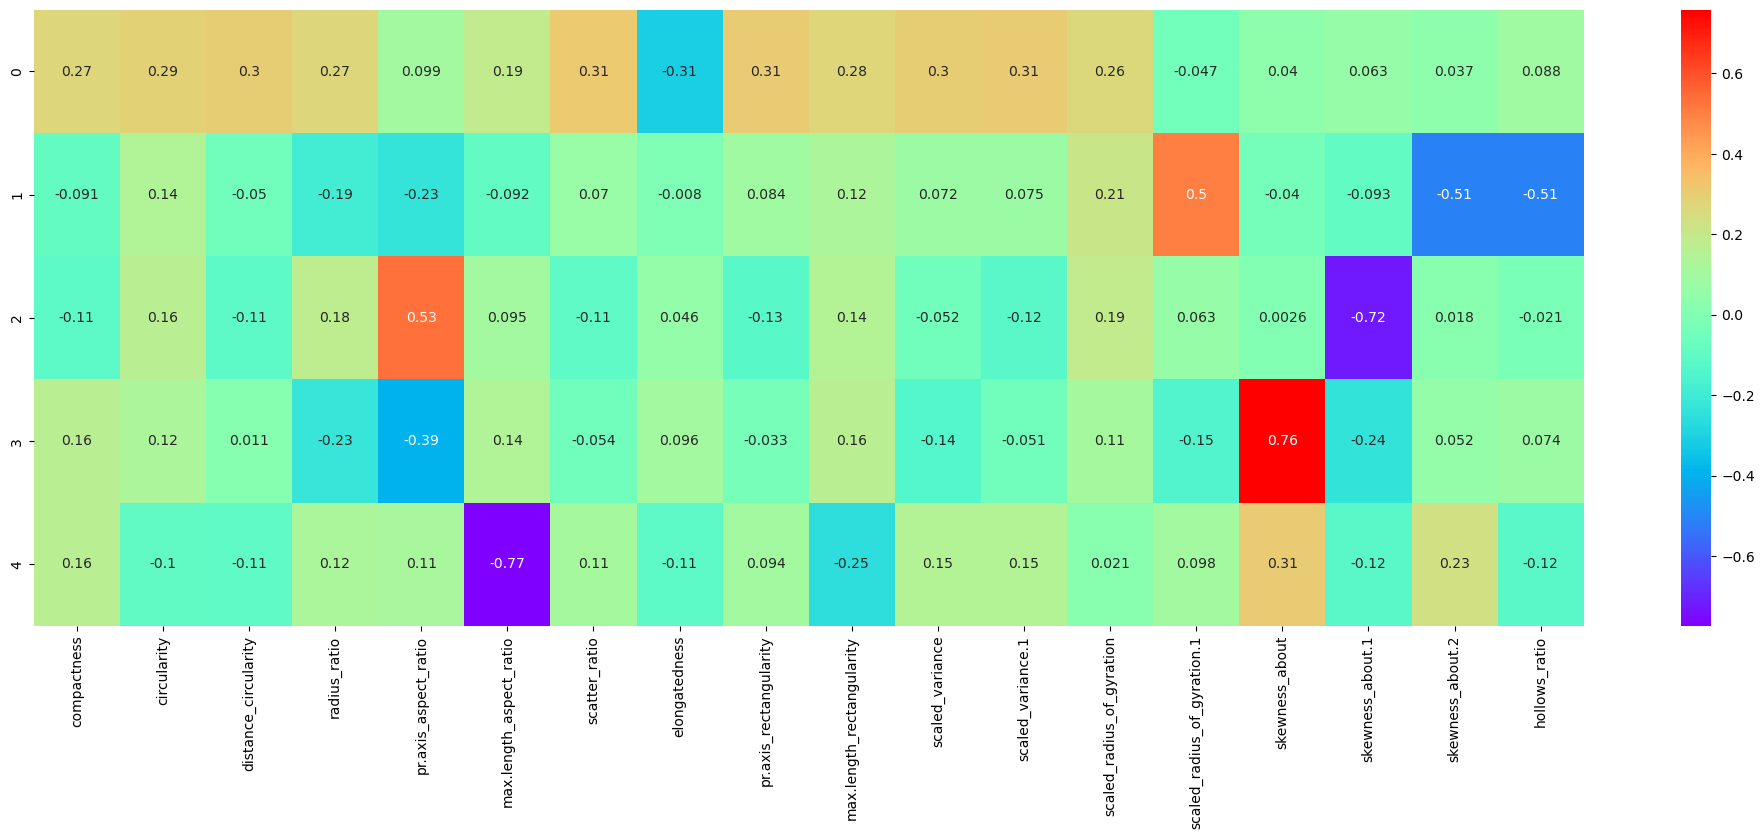

In [166]:
plt.figure(figsize=(25,8))
sns.heatmap(df_pca_loading,cmap='rainbow',annot=True)
plt.show()


In [169]:
df_pcax.columns=['PC0','PC1','PC2','PC3','PC4']
df_pcax.head()


,PC0,PC1,PC2,PC3,PC4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [177]:
corr=df_pcax.corr()
corr=corr.round(4)
corr

,PC0,PC1,PC2,PC3,PC4
PC0,1.0,-0.0,0.0,-0.0,-0.0
PC1,-0.0,1.0,-0.0,-0.0,0.0
PC2,0.0,-0.0,1.0,0.0,-0.0
PC3,-0.0,-0.0,0.0,1.0,-0.0
PC4,-0.0,0.0,-0.0,-0.0,1.0


<AxesSubplot:>

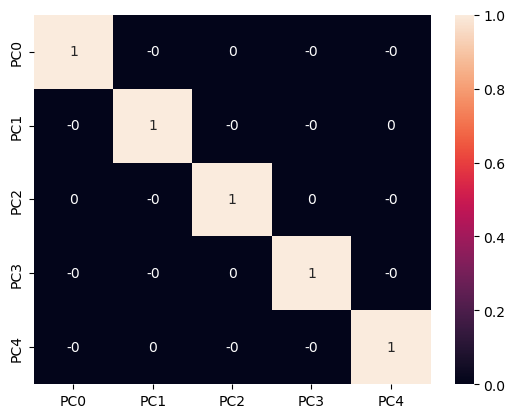

In [178]:
sns.heatmap(corr,annot=True)

In [179]:
pca_n_dtframe=pd.DataFrame(pca_n)
pca_n_dtframe.head()

,0,1,2,3,4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [180]:
pca_n_dtframe.columns=['PC0','PC1','PC2','PC3','PC4']
pca_n_dtframe.head()

,PC0,PC1,PC2,PC3,PC4
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831
2,3.884148,0.268596,0.712210,0.978031,0.602153
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691
4,0.053880,1.854078,2.549616,-1.273745,-1.495840


In [186]:
km1=KMeans(n_clusters=2)
km1.fit(pca_n)
km1.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [187]:
pca_n_dtframe['Labels']=km1.labels_
pca_n_dtframe.head()

,PC0,PC1,PC2,PC3,PC4,Labels
0,0.556908,-0.542515,1.129115,-0.403449,-0.963141,0
1,-1.517672,-0.374168,-0.582221,0.929660,-0.641831,0
2,3.884148,0.268596,0.712210,0.978031,0.602153,1
3,-1.546859,-3.003269,0.161344,0.411144,-0.549691,0
4,0.053880,1.854078,2.549616,-1.273745,-1.495840,0
